In [1]:
################################################################################################################################################
# Modelling gross private domestic investment (GPDI) from Federal Reserve Economic Datasets:
# Examining and plotting raw data
################################################################################################################################################
# import libraries
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
########################################################################
# pre-processing: read in all files into dfs within a dict, clean and plot
########################################################################
folder="C:/Users/bcm9/Documents/Py_code/Data/FRED/"
filelist = glob.glob(os.path.join(folder, "*.xls"))
print(filelist)

['C:/Users/bcm9/Documents/Py_code/Data/FRED\\BOPGSTB.xls', 'C:/Users/bcm9/Documents/Py_code/Data/FRED\\CPALTT01USM657N.xls', 'C:/Users/bcm9/Documents/Py_code/Data/FRED\\GDPC1.xls', 'C:/Users/bcm9/Documents/Py_code/Data/FRED\\GPDI.xls', 'C:/Users/bcm9/Documents/Py_code/Data/FRED\\PCECC96.xls', 'C:/Users/bcm9/Documents/Py_code/Data/FRED\\UNRATE.xls']


In [3]:
# create empty dictionary 
df_dict = {}

# append datasets into the list
for file in filelist:
    df = pd.read_excel(file)
    # get the name of the csv without the '.csv' extension
    filename = os.path.splitext(os.path.basename(file))[0]
    df_dict[filename] = df

In [4]:
for key in df_dict.keys():
    df = df_dict[key]
    df = df.loc[10:, :].copy()
    df['date'] = pd.to_datetime(df['FRED Graph Observations'])
    df_dict[key] = df

In [5]:
# drop all original date format from df and rename columns for later identification
for key in df_dict.keys():
    df_dict[key] = df_dict[key].drop('FRED Graph Observations', axis=1)
    df_dict[key]=df_dict[key].rename(columns={"Unnamed: 1": key})

In [6]:
for key in df_dict.keys():
    print(df_dict[key])

    BOPGSTB       date
10    -2026 1992-01-01
11     -831 1992-02-01
12    -2641 1992-03-01
13    -3109 1992-04-01
14    -3919 1992-05-01
..      ...        ...
377  -65252 2022-08-01
378  -73611 2022-09-01
379  -77330 2022-10-01
380  -61015 2022-11-01
381  -67419 2022-12-01

[372 rows x 2 columns]
    CPALTT01USM657N       date
10        -0.340136 1960-01-01
11         0.341297 1960-02-01
12                0 1960-03-01
13         0.340136 1960-04-01
14                0 1960-05-01
..              ...        ...
761        -0.03544 2022-08-01
762        0.215078 2022-09-01
763        0.405649 2022-10-01
764       -0.101003 2022-11-01
765       -0.307009 2022-12-01

[756 rows x 2 columns]
         GDPC1       date
10     2034.45 1947-01-01
11    2029.024 1947-04-01
12    2024.834 1947-07-01
13    2056.508 1947-10-01
14    2087.442 1948-01-01
..         ...        ...
309  20006.181 2021-10-01
310  19924.088 2022-01-01
311  19895.271 2022-04-01
312  20054.663 2022-07-01
313  20187.495 202

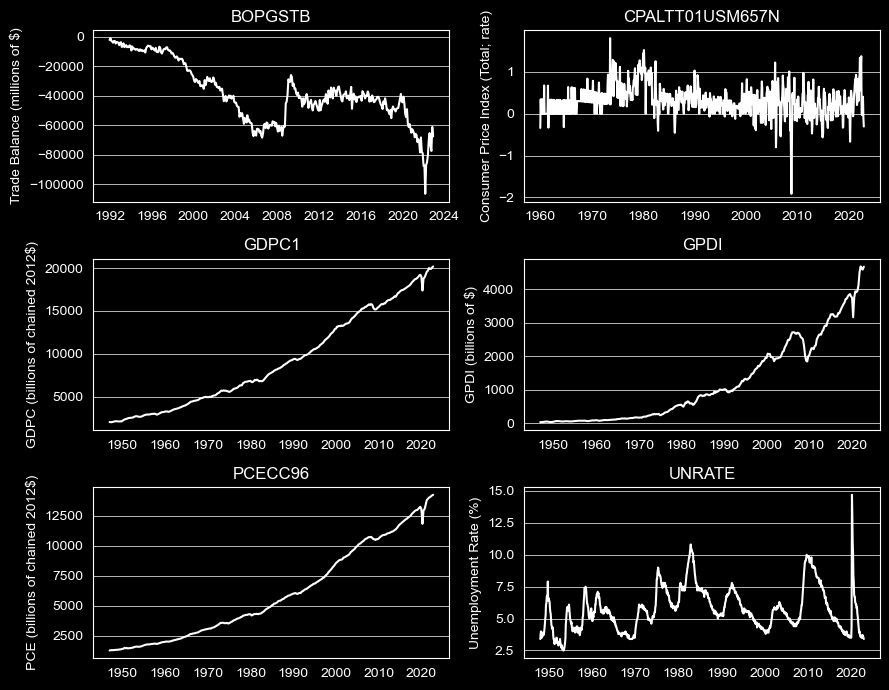

In [29]:
# dark plot
sns.set_style("dark")

# set number of rows and columns for the subplots
num_rows = 3
num_cols = 2

# create fig and subplots
fig, ax = plt.subplots(num_rows, num_cols, figsize=(9,7))

# set background colour of fig
fig.set_facecolor('black')

# loop over the keys in the dictionary, create subplots for each dataframe
row = 0
col = 0
for key in df_dict.keys():
    df = df_dict[key]
    ax[row, col].plot(df['date'], df[key], linewidth='1.5',color='white')
    ax[row, col].set_title(key,color='white')
    ax[row, col].grid(axis='y', linestyle='-', linewidth='0.5', color='white')
    ax[row, col].set_facecolor('black')  # background colour of subplot
    ax[row, col].tick_params(colors='white')  # tick label color
    ax[row, col].xaxis.label.set_color('white')  # x-axis label color
    ax[row, col].yaxis.label.set_color('white')  # y-axis label color
    # manually add ylabels
    ax[0, 0].set_ylabel('Trade Balance (millions of $)')
    ax[0, 1].set_ylabel('Consumer Price Index (Total; rate)')
    ax[1, 0].set_ylabel('GDPC (billions of chained 2012$)')
    ax[1, 1].set_ylabel('GPDI (billions of $)')
    ax[2, 0].set_ylabel('PCE (billions of chained 2012$)')
    ax[2, 1].set_ylabel('Unemployment Rate (%)')
    col += 1
    if col == num_cols:
        row += 1
        col = 0
            
plt.tight_layout()

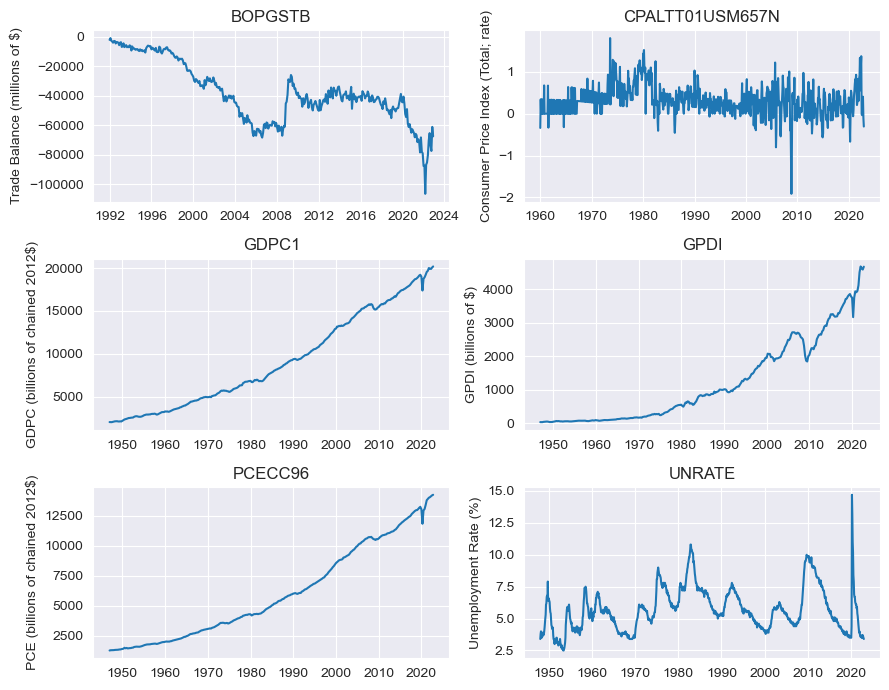

In [30]:
# light standard plot
# set number of rows and columns for the subplots
num_rows = 3
num_cols = 2

# Create a figure and subplots
fig, ax = plt.subplots(num_rows, num_cols, figsize=(9,7))

# loop over the keys in the dictionary, create subplots for each dataframe
row = 0
col = 0
for key in df_dict.keys():
    df = df_dict[key]
    ax[row, col].plot(df['date'], df[key], linewidth='1.5')
    ax[row, col].set_title(key)
    ax[row, col].grid()
    # manually add ylabels
    ax[0, 0].set_ylabel('Trade Balance (millions of $)')
    ax[0, 1].set_ylabel('Consumer Price Index (Total; rate)')
    ax[1, 0].set_ylabel('GDPC (billions of chained 2012$)')
    ax[1, 1].set_ylabel('GPDI (billions of $)')
    ax[2, 0].set_ylabel('PCE (billions of chained 2012$)')
    ax[2, 1].set_ylabel('Unemployment Rate (%)')
    col += 1
    if col == num_cols:
        row += 1
        col = 0

plt.tight_layout()